<a href="https://colab.research.google.com/github/abigailcorcelli/abigailcorcelli.github.io/blob/main/DataAnalysis/FinalProject_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open files and import pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bookfile = pd.read_csv('/content/drive/MyDrive/EnhancedPENAmericaData - Removed Duplicates (1).csv')
#bookfile.head()

In [ ]:
coverfile = pd.read_csv("/content/drive/MyDrive/data/BannedBooks_covers.csv")
#coverfile.head(5)

Merge two metadata files on "Title" column


In [ ]:
completebook_metadata = pd.merge(bookfile, coverfile, on = 'Title')
#completebook_metadata.head(10)

Extract data on publishers only

In [ ]:
pubdata = completebook_metadata[["Author_x", "Title", "Imprint", "Publisher"]]
#pubdata.head(10)





Write a new file with counts for the number of banned books published by each publishing house.

In [ ]:
bigfive = pubdata["Publisher"]
bigfive.head()
bigfivecounts = {"Penguin Random House": 0, "Macmillan": 0, "Hachette": 0, "Simon & Schuster": 0, "HarperCollins": 0, "Independent": 0}
for publisher in bigfive:
  if publisher in bigfivecounts:
    bigfivecounts[publisher] += 1
  else:
    bigfivecounts["Independent"] += 1
print(bigfivecounts)

{'Penguin Random House': 233, 'Macmillan': 90, 'Hachette': 75, 'Simon & Schuster': 105, 'HarperCollins': 121, 'Independent': 474}


In [ ]:
pubcountheader = ["Publisher", "Counts"]
pubcountrowdata = []
for publisher in bigfivecounts:
  row = [publisher, bigfivecounts[publisher]]
  pubcountrowdata.append(row)
#print(pubcountrowdata)

pubdata = pd.DataFrame(pubcountrowdata, columns= pubcountheader)
pubdata.to_csv('publishercounts.csv', index = False)

View Publisher Count as a dataframe and visualize as a pie chart with Matplot



In [ ]:
pubcsv = pd.read_csv('publishercounts.csv')
#pubcsv.head(6)

In [ ]:
import matplotlib.pyplot as plt

plt.close("all")

<Figure size 640x480 with 0 Axes>

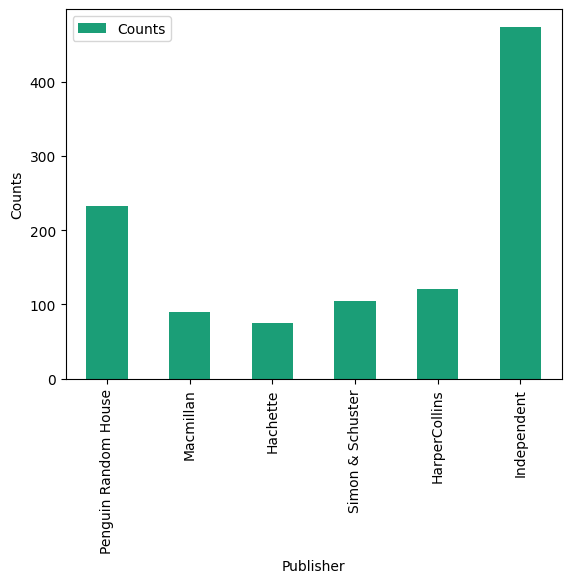

In [ ]:
#plt.figure();

#pubcsv.set_index("Publisher").plot.bar(xlabel="Publisher", ylabel="Counts",colormap="Dark2",);


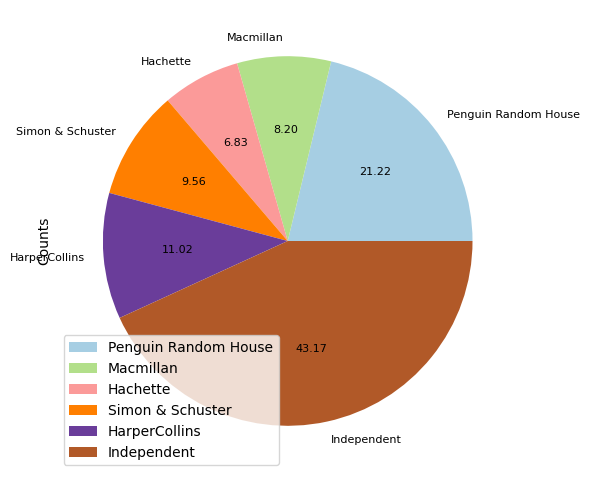

In [ ]:
pubcsv.set_index("Publisher").plot.pie(y="Counts",
    colormap="Paired",
    autopct="%.2f",
    fontsize=8,
    figsize=(6, 6),
);


duplicate process for data on genre and publication year

In [ ]:
genredata = completebook_metadata[["Author_x", "Title", "Genre"]]

In [ ]:
genres = genredata["Genre"]
genrecounts = {}
for genre in genres:
  if genre not in genrecounts:
    genrecounts[genre] = 0
    genrecounts[genre] += 1
  elif genre in genrecounts:
    genrecounts[genre] += 1
print(genrecounts)


{'Education': 19, 'Race': 10, 'Mystery': 24, 'LGBT': 231, 'Self Help': 1, nan: 68, 'Short Stories': 7, 'Biography': 17, 'History': 13, 'Writing': 1, 'Poetry': 29, 'Contemporary': 64, 'Picture Books': 214, 'Realistic Fiction': 63, 'Banned Books': 7, 'Fantasy': 54, 'Historical Fiction': 45, 'Sports': 10, 'Graphic Novel': 49, 'Plays': 2, 'Romance': 44, 'Memoir': 15, 'Family': 6, 'Science': 2, 'Spanish Literature': 4, 'Technology': 1, 'Magical Realism': 2, 'Manga': 4, 'Science Fiction': 10, 'Horror': 7, 'Jewish': 2, 'Politics': 4, 'Paranormal': 1, 'Teen': 1, 'Vampires': 2, 'Abstinence': 1, 'Feminism': 6, 'African American': 1, 'Music': 3, 'Paranormal Romance': 3, 'Sex and Gender': 1, 'Picture Books ': 1, 'Art': 1, 'Disability': 1, 'Psychology': 1, 'Thriller': 2, 'Social Justice': 3, 'Gender Prejudice': 1, 'Mental Health': 6, 'Chick Lit': 3, 'Mathematics': 1, 'Chapter Books': 9, 'Christian Fiction': 1, 'Cultural': 2, 'Abuse': 2, 'Literary Fiction': 1, 'School': 2, 'Biography ': 1, 'Parentin

In [ ]:
from inspect import getinnerframes
genrecountheader = ["Genre", "Counts"]
genrerowdata = []
for genre in genrecounts:
  if int(genrecounts[genre]) > 25: #identify most significant genre catagories
    if genre != "":
      row = [genre, int(genrecounts[genre])]
      genrerowdata.append(row)


genredata = pd.DataFrame(genrerowdata, columns= genrecountheader)
genredata.to_csv('genrecounts.csv', index = False)

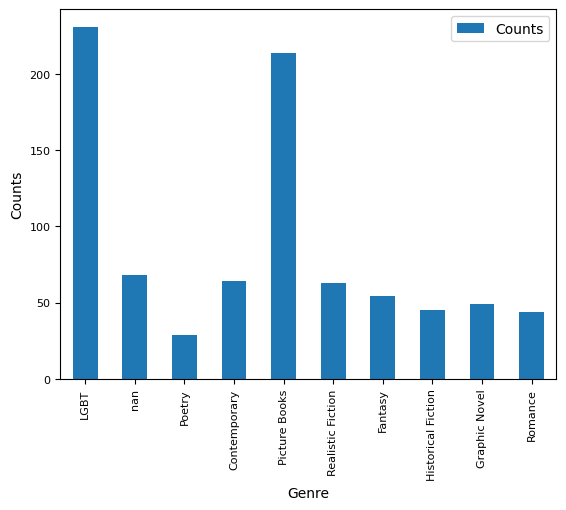

In [ ]:
genrecounts = pd.read_csv('genrecounts.csv')
genrecounts.set_index("Genre").plot.bar(xlabel="Genre", ylabel="Counts",colormap="tab10", fontsize=8);

In [ ]:
yeardata = completebook_metadata[["Author_x", "Title", "PubYear"]]

#yeardata.head()

,Author_x,Title,PubYear
0,"Delpit, Lisa","""Multiplication Is for White People"": Raising ...",2012
1,"Thomas, Rachael L.",#BlackLivesMatter: Protesting Racism,2019
2,"McNeil, Gretchen",#MurderTrending (MurderTrending Series),2018
3,"Mac, Carrie",10 Things I Can See from Here,2017
4,"Ewert, Marcus","10,000 Dresses",2008


In [ ]:
years = yeardata["PubYear"]
yearcounts = {}
for year in years:
  if year not in yearcounts:
    yearcounts[year] = 0
    yearcounts[year] += 1
  elif year in yearcounts:
    yearcounts[year] += 1

print(yearcounts)

{'2012': 35, '2019': 128, '2018': 109, '2017': 74, '2008': 32, '2007': 24, '2004': 14, '2003': 16, '2020': 113, '2011': 23, '2006': 25, '2021': 64, '2016': 61, '2005': 26, '1994': 6, '2000': 13, '2015': 55, '2010': 29, '1959': 1, '1991': 7, '2009': 27, '2013': 39, '2001': 11, '2014': 46, '1982': 3, '1993': 10, '1987': 2, '1999': 13, '1995': 6, '1972': 2, '1977': 3, '1980': 1, '1990': 5, '2002': 13, '1975': 1, '1992': 8, '1998': 3, '1953': 1, '1997': 10, '1986': 3, '1971': 3, '1989': 4, '1996': 1, '1978': 1, '2022': 4, '1955': 1, '1954': 1, '1845': 1, '1956': 1, '1970': 3, '1904? 1911? 1928?': 1, '1973': 1, '1981': 1, '1983': 1, '1984': 2, '1969': 1, '1974': 1, '1963': 1, '1988': 1, '1967': 2, '1985': 1, '1979': 1, '1937': 1, '1966': 1}


In [ ]:
yearcountheader = ["Year", "Counts"]
yearcountrowdata = []
for year in yearcounts:
  row = [year, yearcounts[year]]
  yearcountrowdata.append(row)


yeardata = pd.DataFrame(yearcountrowdata, columns= yearcountheader)
yeardata.to_csv('yearcounts.csv', index = False)

Verify valid dates using Regular Expression and reformat data to be used in a timeline visualization

In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates
import re

dates = []
counts = []
for year in yearcounts:
  if re.fullmatch('[1-9]\d{3}$',year):
    if int(year) > 1950:
      formatyear = year + "-01-01"
      dates.append(formatyear)
      counts.append(yearcounts[year])
  # Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]




Edit timeline template

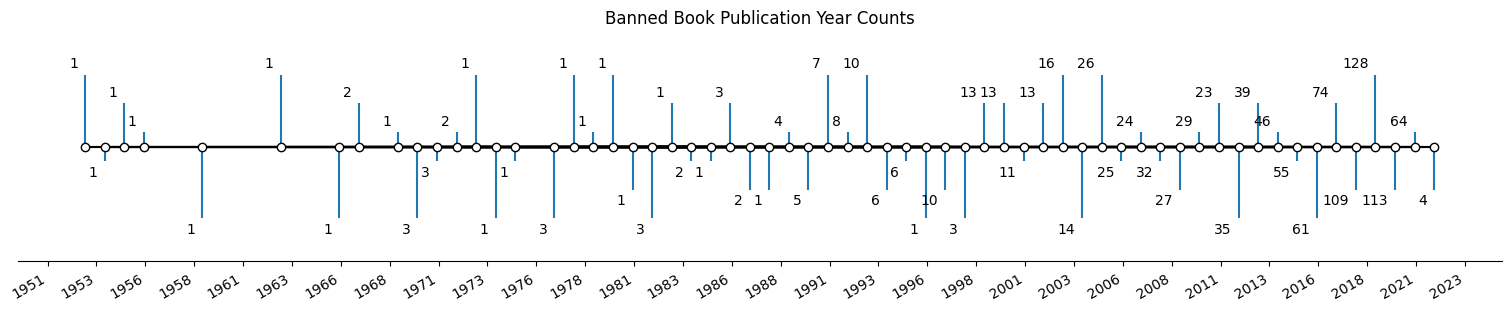

In [ ]:

levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 3), layout="constrained")
ax.set(title="Banned Book Publication Year Counts")

ax.vlines(dates, 0, levels, color="tab:blue")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, counts):
    ax.annotate(r, xy=(d, l),
                xytext=(-5, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.3)
plt.show()